In [1]:
# by SH

# titanic dataset from a Stanford course:
# https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

# regression model that predicts the age of the passenger based on the other data features

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

In [3]:
# Loading and reviewing data

df = pd.read_csv("titanic.csv", engine='python')
df.shape

(887, 8)

In [4]:
# label encoding
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Sex'] = labelEncoder.fit_transform(df['Sex'].astype(str))

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


Text(3.799999999999997, 0.5, 'Fare')

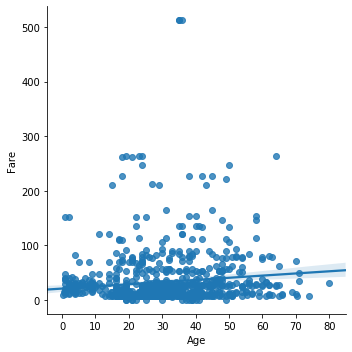

In [5]:
import seaborn as sns

sns.lmplot('Age', 'Fare', df)

plt.xlabel("Age")
plt.ylabel("Fare")

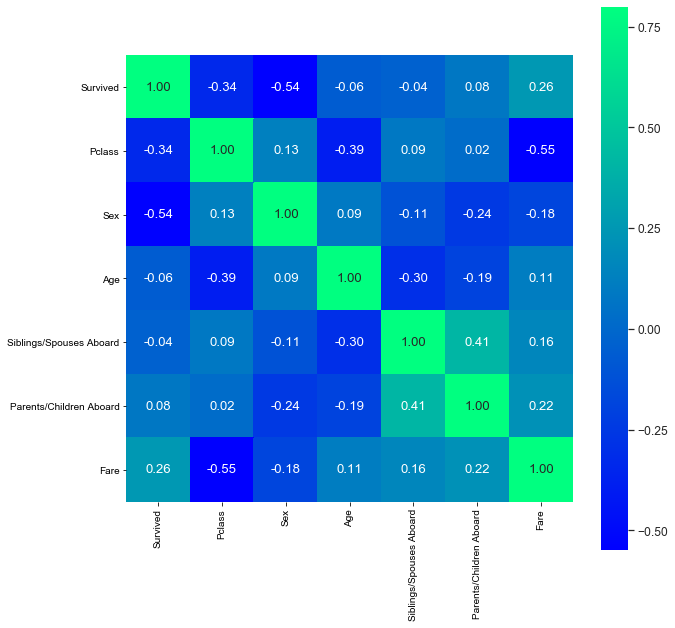

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()

In [7]:
# Spliting the data
# 100 for testing, rest for training

from sklearn.model_selection import train_test_split

X = df.drop(['Age', 'Name'], axis=1)
#X = df.drop(['Age', 'Name', 'Parents/Children Aboard'], axis=1)
y = df['Age']

#split_test_size = 100/887
split_test_size = 100/len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=0) 

In [8]:
X_train.shape , y_train.shape

((787, 6), (787,))

# Linear Regression

In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Check R-square on training data
lr_model.score(X_train, y_train)

0.25692720324022333

In [11]:
y_predict = lr_model.predict(X_test)

y_predict

array([29.46547061,  0.54857087, 43.3236289 , 22.22813848, 18.65730191,
       43.68169012, 33.38127693, 17.94618915, 43.44162635, 36.05997211,
       27.35537975, 33.15968801, 28.83704208, 31.74701613, 28.77732723,
       28.84310742, 29.10733691, 22.22877865, 43.44162635, 32.14117308,
        1.17662325, 28.8385114 , 28.83564781, 29.4314316 , 36.83536028,
       36.97774693, 18.69701145, 30.21953515, 28.84065886, 28.83564781,
       27.42585896, 22.85958159, 37.4666524 , 22.86252023, 43.41314421,
       33.77683818, 43.44162635, 22.22644311, 22.22813848, 24.5624764 ,
       28.83010962, 25.54627895, 31.8419566 , 28.83704208, 28.8383604 ,
       28.83338732, 33.80411503, 28.83741822, 27.83327129, 29.46370019,
       28.83704208, 28.84306944, 10.40311452, 26.18921257, 28.83813435,
       36.05997211, 19.56569176, 28.8383604 , 22.84933435, 28.84306944,
       20.82883385, 28.84310742, 28.8383604 , 36.17751746, 28.84740235,
       25.13837655, 28.83704208, 29.08021106, 28.83813435, 37.45

In [12]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_predict})

df_y.sample(10)

,y_test,y_pred
664,49.0,28.838134
634,31.0,31.841957
27,19.0,29.655566
532,7.0,28.078777
764,28.0,25.473491
769,29.0,28.843107
830,18.0,28.833387
626,18.0,28.838511
413,32.0,29.463700
482,8.0,18.657302


In [13]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_predict)

print("Testing score : ", score)

Testing score :  0.3552882616660181


In [14]:
# Graph between predicted and actual values

def graphPredAct(test, predict):
    plt.subplots(figsize=(16,8))
    plt.plot(predict, label="Prediction")
    plt.plot(test.values, label="Actual")
    plt.ylabel('Age')

    plt.legend()

    plt.show()

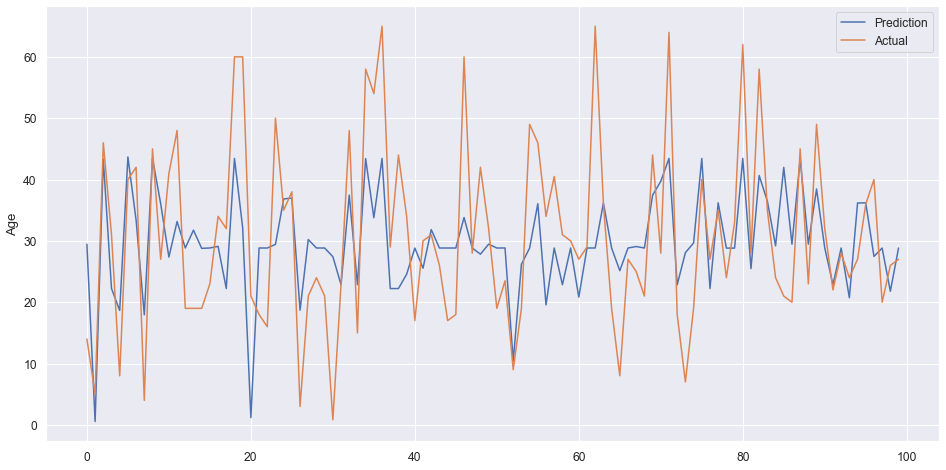

In [15]:
# Graph between predicted and actual values
graphPredAct(y_test, y_predict)

# Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

#lasso_model = Lasso(alpha=0.5, normalize=True)
lasso_model = Lasso(alpha=0.001, normalize=True)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lasso_model.score(X_train, y_train)

0.25687999660024874

In [18]:
y_pred = lasso_model.predict(X_test)

In [19]:
r_square = lasso_model.score(X_test, y_test)
r_square

0.35510379068802334

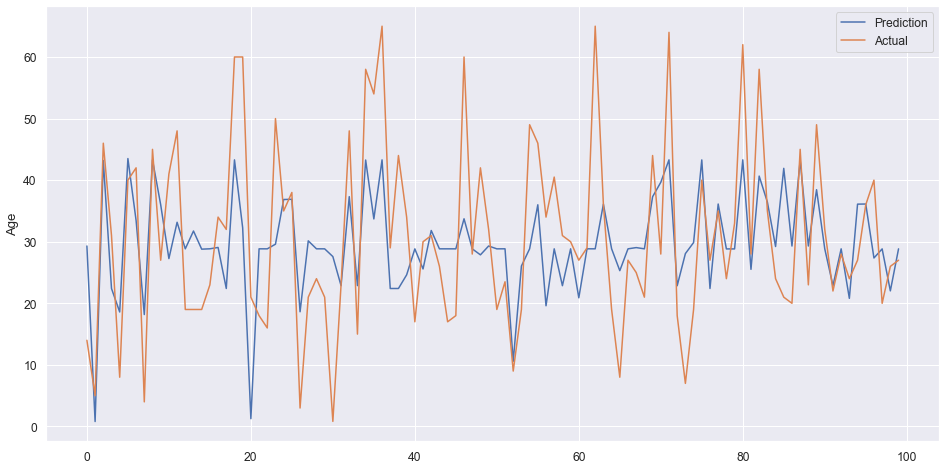

In [20]:
graphPredAct(y_test, y_pred)

# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.9)
#ridge_regression = Ridge(alpha=0.5, normalize=True)
    
ridge_regression.fit(X_train, y_train)
    
y_predict = ridge_regression.predict(X_test)

y_predict

array([29.43212478,  0.58342772, 43.27644301, 22.29232304, 18.63572908,
       43.62933654, 33.40188268, 18.01428212, 43.39273747, 36.03734326,
       27.32303124, 33.15787537, 28.83838246, 31.72874318, 28.77952945,
       28.84436026, 29.11216844, 22.29295397, 43.39273747, 32.16494833,
        1.17679932, 28.83983057, 28.83700832, 29.4658809 , 36.84927753,
       36.96399272, 18.67486551, 30.22304317, 28.84194704, 28.83700832,
       27.46584656, 22.88903644, 37.4458421 , 22.89193266, 43.3646664 ,
       33.76611855, 43.39273747, 22.29065215, 22.29232304, 24.56761864,
       28.83155005, 25.55195073, 31.82231344, 28.83838246, 28.83968175,
       28.83478045, 33.79300173, 28.83875318, 27.83437031, 29.43037992,
       28.83838246, 28.84432284, 10.4252333 , 26.1599888 , 28.83945897,
       36.03734326, 19.59952313, 28.83968175, 22.87893709, 28.84432284,
       20.8581409 , 28.84436026, 28.83968175, 36.15319214, 28.8485932 ,
       25.18294398, 28.83838246, 29.08543409, 28.83945897, 37.42

In [22]:
# Train test score
print("Training score : ", ridge_regression.score(X_train, y_train))


Training score :  0.25692350170688905


In [23]:
predictors = X_train.columns
coef = pd.Series(ridge_regression.coef_,predictors).sort_values()
print(coef)

Pclass                    -7.360296
Survived                  -6.545799
Siblings/Spouses Aboard   -3.213320
Parents/Children Aboard   -0.999482
Sex                       -0.593372
Fare                      -0.008911
dtype: float64


In [24]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_predict)

print("Testing score : ", score)

Testing score :  0.35523937467317024


# Support Vector Regression (SVR)

In [25]:
from sklearn.svm import SVR

regression_model = SVR(kernel='linear', C=0.9)
regression_model.fit(X_train, y_train)

SVR(C=0.9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
regression_model.coef_

array([[-3.29535234e+00, -7.17302893e+00,  7.04953887e-01,
        -2.68707583e+00, -1.16598282e+00, -2.71306337e-03]])

In [27]:
regression_model.score(X_train, y_train)

0.23126709497232234

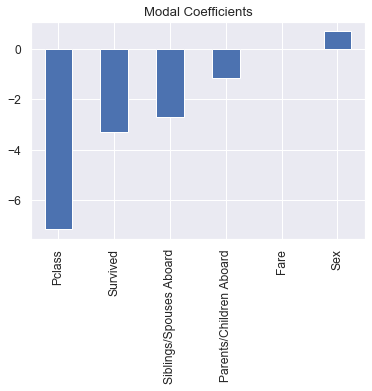

In [28]:
# Use matplotlib to view the coefficients as a histogram
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [29]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

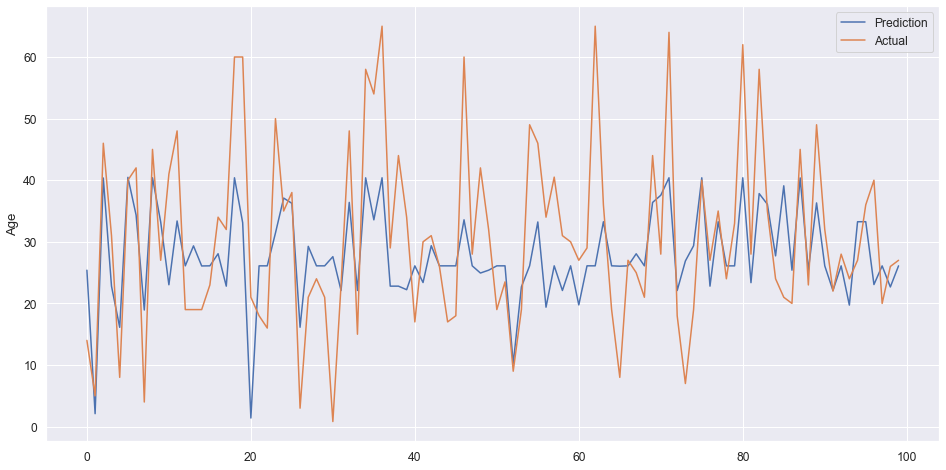

In [30]:
graphPredAct(y_test, y_predict)

In [31]:
regression_model.score(X_test, y_test)

0.3401356414498107

In [32]:
# Calculate Mean Square Error

regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse


144.38268078731912

In [33]:
# Root of Mean Square Error to measure degree to which our prediction is off
import math

math.sqrt(regression_model_mse)

12.015934453354808

# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
gbr_model.score(X_train, y_train)

0.481864629327463

In [36]:
y_predict = gbr_model.predict(X_test)

In [37]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.43079951542580314

In [38]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='ls'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200}

In [39]:
# Analyze the results of the grid search
grid_search.cv_results_

{'mean_fit_time': array([0.05143563, 0.10366511, 0.24005461, 0.06249126, 0.11920555,
        0.34937437, 0.09092339, 0.16186142, 0.42441074, 0.04712009,
        0.0965546 , 0.26223405, 0.06563473, 0.12102588, 0.32222152,
        0.07291214, 0.14383976, 0.35315204, 0.04844252, 0.09390918,
        0.23229321, 0.05986794, 0.12233067, 0.33248432, 0.10169212,
        0.15311337, 0.35810955, 0.04860894, 0.09555793, 0.2433664 ,
        0.073903  , 0.11687764, 0.28916828, 0.07109364, 0.14598934,
        0.35555577]),
 'std_fit_time': array([0.00541743, 0.01268588, 0.00524526, 0.00490365, 0.00339524,
        0.00530756, 0.0120771 , 0.02170679, 0.02511014, 0.0004051 ,
        0.00362955, 0.02886421, 0.00182302, 0.00107375, 0.03152215,
        0.00246319, 0.00107177, 0.00345971, 0.00116921, 0.00084282,
        0.00306644, 0.00059754, 0.00314023, 0.02634552, 0.00066573,
        0.01050024, 0.00069282, 0.00107298, 0.00061567, 0.00810307,
        0.00124471, 0.00228372, 0.00246351, 0.00046738, 0.008

In [40]:
for i in range(36):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])
    print()

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Mean Test Score:  0.260727316791076
Rank:  9

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean Test Score:  0.29970743617959417
Rank:  3

Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean Test Score:  0.29689719131058295
Rank:  4

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Mean Test Score:  0.2663158957574891
Rank:  8

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Mean Test Score:  0.2813808262995416
Rank:  6

Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Mean Test Score:  0.24340309479194175
Rank:  14

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
Mean Test Score:  0.22048403704860076
Rank:  16

Parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}
Mean Test Score:  0.18334037873855777
Rank:  19

Parameters:  {'learning_r

In [41]:
# now with best params from grid search result
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.02, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
y_predict_gbr = gbr_model.predict(X_test)

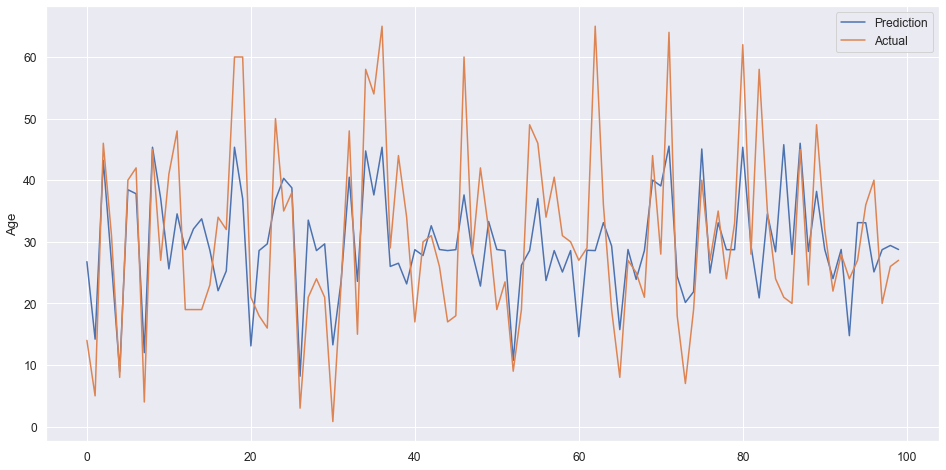

In [43]:
graphPredAct(y_test, y_predict_gbr)

In [44]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.4333407279001473

In [45]:
score = r2_score(y_test, y_predict_gbr)
score

0.4333407279001473